In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path ='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

symboling  normalized-losses         make aspiration num-of-doors  \
0          3                122  alfa-romero        std          two   
1          3                122  alfa-romero        std          two   
2          1                122  alfa-romero        std          two   
3          2                164         audi        std         four   
4          2                164         audi        std         four   

    body-style drive-wheels engine-location  wheel-base    length  ...  \
0  convertible          rwd           front        88.6  0.811148  ...   
1  convertible          rwd           front        88.6  0.811148  ...   
2    hatchback          rwd           front        94.5  0.822681  ...   
3        sedan          fwd           front        99.8  0.848630  ...   
4        sedan          4wd           front        99.4  0.848630  ...   

   compression-ratio  horsepower  peak-rpm city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0       21          27  13495.0   
1                9.0       111.0    5000.0       21          27  16500.0   
2                9.0       154.0    5000.0       19          26  16500.0   
3               10.0       102.0    5500.0       24          30  13950.0   
4                8.0       115.0    5500.0       18          22  17450.0   

  city-L/100km  horsepower-binned  diesel  gas  
0    11.190476             Medium       0    1  
1    11.190476             Medium       0    1  
2    12.368421             Medium       0    1  
3     9.791667             Medium       0    1  
4    13.055556             Medium       0    1  

[5 rows x 29 columns]

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
df.count()

symboling            201
normalized-losses    201
make                 201
aspiration           201
num-of-doors         201
body-style           201
drive-wheels         201
engine-location      201
wheel-base           201
length               201
width                201
height               201
curb-weight          201
engine-type          201
num-of-cylinders     201
engine-size          201
fuel-system          201
bore                 201
stroke               197
compression-ratio    201
horsepower           201
peak-rpm             201
city-mpg             201
highway-mpg          201
price                201
city-L/100km         201
horsepower-binned    200
diesel               201
gas                  201
dtype: int64

In [6]:
df[['highway-mpg']].count()

highway-mpg    201
dtype: int64

In [7]:
X = df[['highway-mpg']]
Y = df['price']

In [8]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
Yhat = lm.predict(X)

In [10]:
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [11]:
lm.intercept_

38423.3058581574

In [12]:
lm.coef_

array([-821.73337832])

In [13]:
lm.coef #checking syntax

AttributeError: 'LinearRegression' object has no attribute 'coef'

In [14]:
lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
lm1.fit(df[['engine-size']],df[['price']])
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
lm1.intercept_ #to find out intercept

array([-7963.33890628])

In [17]:
lm1.coef_ # to find out slope

array([[166.86001569]])

In [18]:
Yhat = lm.intercept_ + lm.coef_ * X

In [19]:
Yhat.head()

highway-mpg
0  16236.504643
1  16236.504643
2  17058.238022
3  13771.304508
4  20345.171535

In [20]:
Price = lm.intercept_ + lm.coef_ * df[['engine-size']]

In [21]:
Price.head()

engine-size
0 -68402.033324
1 -68402.033324
2 -86480.167647
3 -51145.632379
4 -73332.433594

In [22]:
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [23]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
lm.intercept_

-15806.62462632923

In [25]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

In [26]:
#  By using formula of a straight line y = ax+ b "where a is the slope and b is the inercept"
#  Here we have multiple slopes, i.e, because of multiple linear regression, we use them to predict the values

Price = lm.intercept_ + lm.coef_[0]*df['horsepower'] + lm.coef_[1]*df['curb-weight'] + lm.coef_[2]*df['engine-size'] + lm.coef_[3]*df['highway-mpg']

In [27]:
# This is another way to predict the price, "replace with values instead of formulas". But this is correct according to notes and  incorrect according to console

Price1 = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight + 81.95906216 x engine-size + 33.58258185 x highway-mpg

SyntaxError: invalid syntax (<ipython-input-27-d83397c45d2a>, line 3)

In [28]:
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses', 'highway-mpg']], df['price'])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lm2.coef_

array([   1.49789586, -820.45434016])

In [30]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0, 48284.22429020983)

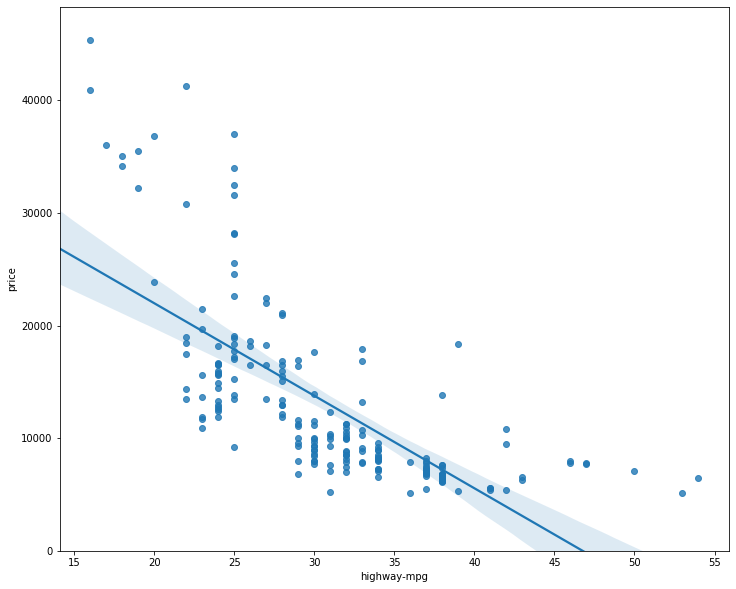

In [31]:
width = 12
height = 10
plt.figure(figsize=(12,10))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

(0, 47422.919330307624)

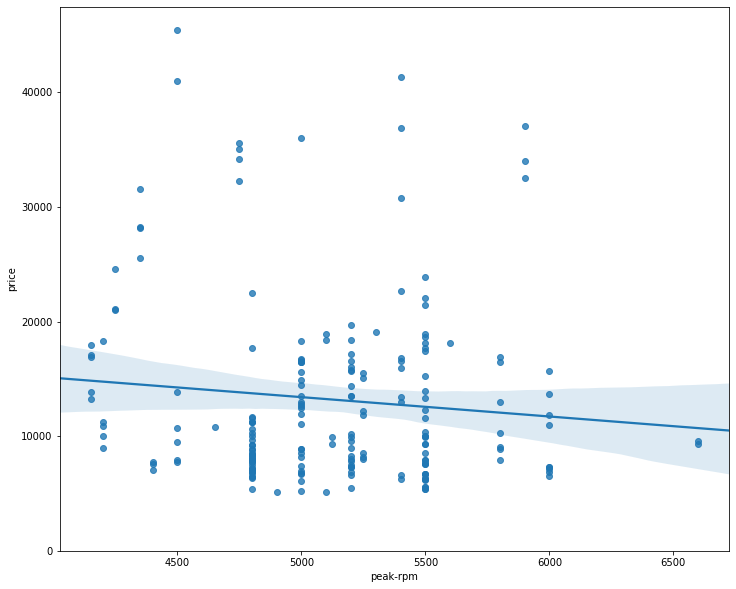

In [32]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [33]:
df[['peak-rpm','highway-mpg','price']].corr()

peak-rpm  highway-mpg     price
peak-rpm     1.000000    -0.058598 -0.101616
highway-mpg -0.058598     1.000000 -0.704692
price       -0.101616    -0.704692  1.000000

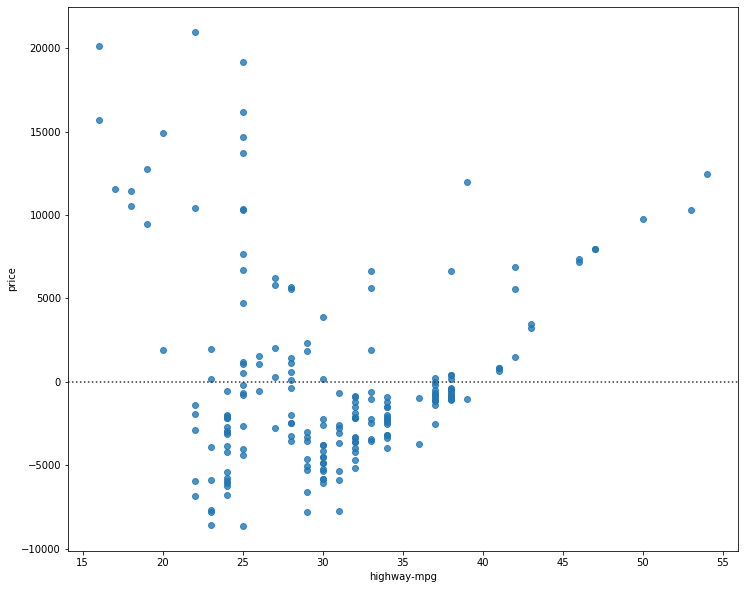

In [34]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In [35]:
Y_hat = lm.predict(Z)

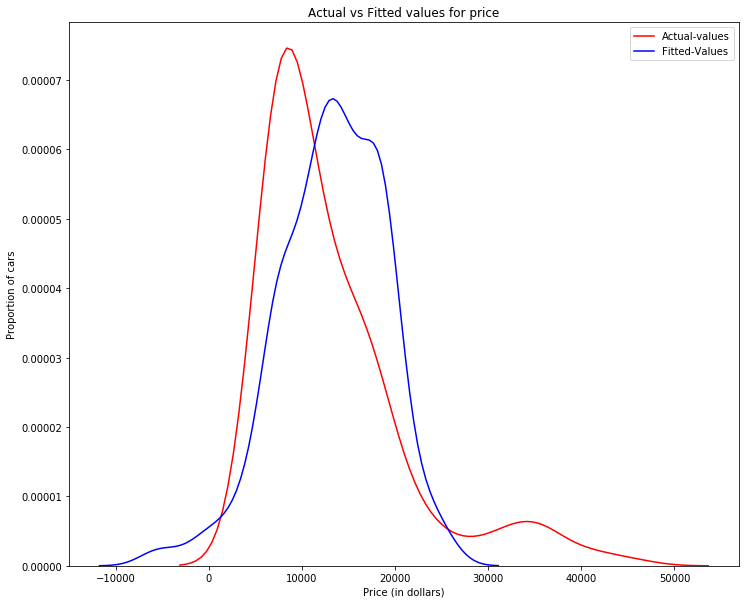

In [36]:
plt.figure(figsize=(width,height))

ax1 = sns.distplot(df['price'], hist = False, color = 'r', label="Actual-values")
sns.distplot(Yhat,hist= False, color = 'b', label ="Fitted-Values", ax = ax1)

plt.title('Actual vs Fitted values for price')
plt.xlabel("Price (in dollars)")
plt.ylabel('Proportion of cars')

plt.show()
plt.close()

In [37]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of cars')
    
    plt.show()
    plt.close()

In [38]:
x = df['highway-mpg']
y = df['price']

In [39]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


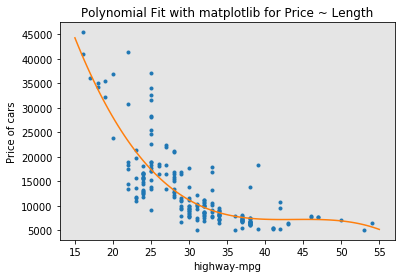

In [40]:
PlotPolly(p, x, y, 'highway-mpg')

In [41]:
np.polyfit(x,y,3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


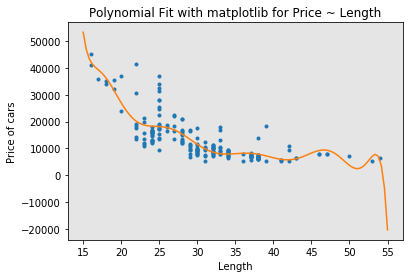

In [42]:
#Creating 11 order polynomial model with x and y values from above
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)

# plotting the graph
PlotPolly(p1,x,y,'Length')

In [43]:
np.polyfit(x,y,11)

array([-1.24263391e-08,  4.72184893e-06, -8.02843483e-04,  8.05640305e-02,
       -5.29740982e+00,  2.39470329e+02, -7.58845741e+03,  1.68447254e+05,
       -2.56531153e+06,  2.55140622e+07, -1.49106965e+08,  3.87930088e+08])

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [46]:
Z_pr = pr.fit_transform(Z)

In [47]:
Z.shape

(201, 4)

In [48]:
Z_pr.shape

(201, 15)

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [50]:
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]

In [51]:
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [53]:
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [54]:
ypipe = pipe.predict(Z)

In [55]:
ypipe

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385, 10510.56542385, 15845.70697835,
       16068.03816037, 18547.43547305, 25222.41976123, 25176.06409341,
       26518.01037743,  5896.19728097,  6225.67595805,  6265.22601565,
        5976.20889391,  5832.72306295, 10109.23396371,  6061.05969767,
        6118.14411398,  6118.14411398, 10042.92800648, 11301.10641037,
       18336.04622938,  7336.72885437,  6420.49643279,  5174.21296336,
        6619.35236359,  6652.09244229,  6765.45204951,  6795.56233742,
        8796.64497511,  8948.23637645,  8991.91184621,  9194.18038695,
       10928.27635866, 10052.96792101,  9660.68466801, 12124.39546671,
       36318.61803898, 36318.61803898, 41642.8179005 ,  5912.27956733,
        5928.15567673,  5941.11734652,  6046.17348651,  6059.47585172,
       10195.17246527, 10195.17246527, 10183.58560528, 15943.91103394,
      

In [56]:
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [59]:
# Create a pipeline that Standardizes the data, then perform prediction using a linear regression model using the features Z and targets y

Input = [('scale', StandardScaler()),('model', LinearRegression())]

pipe = Pipeline(Input)

pipe.fit(Z,y)

ypipe = pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

In [62]:
# highway-mpg fit
lm.fit(X,Y)

#finding R^2
print("The R^2/R-squared is :", lm.score(X,y))

The R^2/R-squared is : 0.4965911884339176


In [65]:
Yhat = lm.predict(X)
print("The first 4 value of the prediction is :", Yhat[0:4])

The first 4 value of the prediction is : [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
mse = mean_squared_error(df['price'], Yhat)
print("The mean squared error of price and predicted value is :", mse)

The mean squared error of price and predicted value is : 31635042.944639888


In [68]:
#fit the model
lm.fit(Z, df['price'])

#Finding R^2
print("The R^2 is : ", lm.score(Z,df['price']))

The R^2 is :  0.8093562806577457


In [71]:
Y_predict_multifit = lm.predict(Z)

In [78]:
print("The mean squared error of price and predicted value using multifit is : ", mean_squared_error(df['price'], Y_predict_multifit))

The mean squared error of price and predicted value using multifit is :  11980366.87072649


In [80]:
from sklearn.metrics import r2_score

In [81]:
r_squared = r2_score(y, p(x))
print('The r squared value is : ', r_squared)

The r squared value is :  0.674194666390652


In [82]:
#calculate the MSE
mean_squared_error(df['price'],p(x))

20474146.426361218

In [84]:
#Create a new input for plotting
new_input = np.arange(1, 100, 1).reshape(-1,1)

In [85]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [86]:
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
#Produce a prediction
yhat = lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

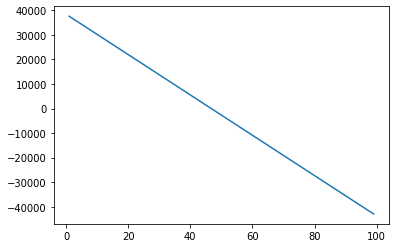

In [88]:
#plot the data 
plt.plot(new_input, yhat)
plt.show()